<a href="https://colab.research.google.com/github/dangvinhhoa06/AI-Thay-Thinh/blob/main/W6_AI_230310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=3d7d4f40402e7de59f6a0aabbd532e03acef3c477adeaf22660dc3b79f5dd88d
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [ ]:
pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib.pylot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matplotlib.pylot (from versions: none)
ERROR: No matching distribution found for matplotlib.pylot


In [ ]:
from IPython.core import prefilter
from IPython.core.interactiveshell import SeparateUnicode
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

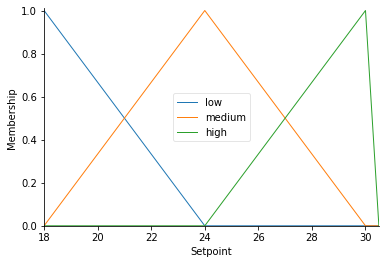

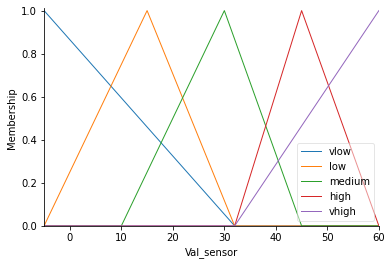

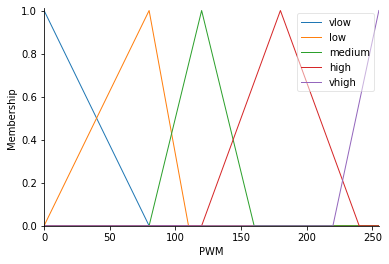

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Input
setpoint = ctrl.Antecedent(np.arange(18,31,0.5),'Setpoint')
val_sensor = ctrl.Antecedent(np.arange(-5,61,1),'Val_sensor')
#Output
pwm = ctrl.Consequent(np.arange(0,256,1),'PWM')

setpoint['low']=fuzz.trimf(setpoint.universe,[18,18,24])
setpoint['medium']=fuzz.trimf(setpoint.universe,[18,24,30])
setpoint['high']=fuzz.trimf(setpoint.universe,[24,30,30])

val_sensor['vlow']=fuzz.trimf(val_sensor.universe,[-5,-5,32])
val_sensor['low']=fuzz.trimf(val_sensor.universe,[-5,15,32])
val_sensor['medium']=fuzz.trimf(val_sensor.universe,[10,30,45])
val_sensor['high']=fuzz.trimf(val_sensor.universe,[32,45,60])
val_sensor['vhigh']=fuzz.trimf(val_sensor.universe,[32,60,60])

pwm['vlow']=fuzz.trimf(pwm.universe,[0,0,80])
pwm['low']=fuzz.trimf(pwm.universe,[0,80,110])
pwm['medium']=fuzz.trimf(pwm.universe,[80,120,160])
pwm['high']=fuzz.trimf(pwm.universe,[120,180,240])
pwm['vhigh']=fuzz.trimf(pwm.universe,[220,255,255])

setpoint.view()
val_sensor.view()
pwm.view()

In [ ]:
# vlow low medium high vhigh 

rule1 = ctrl.Rule(setpoint['low'] & val_sensor['vlow'],pwm['vlow'])
rule2 = ctrl.Rule(setpoint['low'] & val_sensor['low'],pwm['vlow'])
rule3 = ctrl.Rule(setpoint['low'] & val_sensor['medium'],pwm['low'])
rule4 = ctrl.Rule(setpoint['low'] & val_sensor['high'],pwm['low'])
rule5 = ctrl.Rule(setpoint['low'] & val_sensor['vhigh'],pwm['medium'])

rule6 = ctrl.Rule(setpoint['medium'] & val_sensor['vlow'],pwm['low'])
rule7 = ctrl.Rule(setpoint['medium'] & val_sensor['low'],pwm['medium'])
rule8 = ctrl.Rule(setpoint['medium'] & val_sensor['medium'],pwm['medium'])
rule9 = ctrl.Rule(setpoint['medium'] & val_sensor['high'],pwm['high'])
rule10 = ctrl.Rule(setpoint['medium'] & val_sensor['vhigh'],pwm['vhigh'])

rule11 = ctrl.Rule(setpoint['high'] & val_sensor['vlow'],pwm['medium'])
rule12 = ctrl.Rule(setpoint['high'] & val_sensor['low'],pwm['medium'])
rule13 = ctrl.Rule(setpoint['high'] & val_sensor['medium'],pwm['high'])
rule14 = ctrl.Rule(setpoint['high'] & val_sensor['high'],pwm['vhigh'])
rule15 = ctrl.Rule(setpoint['high'] & val_sensor['vhigh'],pwm['vhigh'])

pwming_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                                   rule11,rule12,rule13,rule14,rule15])
pwming = ctrl.ControlSystemSimulation(pwming_ctrl)


91.3581212803935


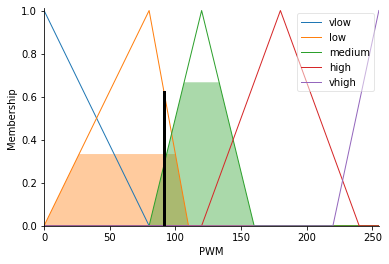

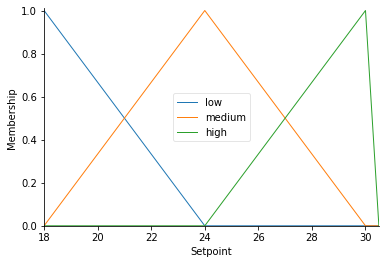

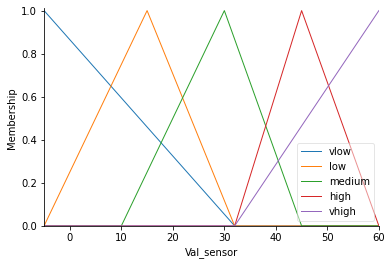

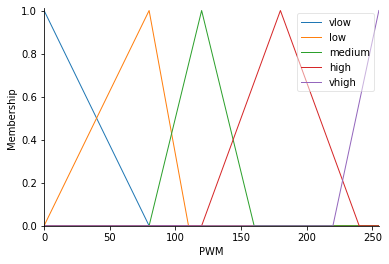

In [ ]:

pwming.input['Setpoint'] = 28
pwming.input['Val_sensor'] = 5 
pwming.compute()
print(pwming.output['PWM'])
pwm.view(sim = pwming)


setpoint.view()
val_sensor.view()
pwm.view()

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Input
l = ctrl.Antecedent(np.arange(0,1.6,0.01),'l')
c = ctrl.Antecedent(np.arange(0,1.6,0.01),'c')
r = ctrl.Antecedent(np.arange(0,1.6,0.01),'r')
#Output
goc1 = ctrl.Consequent(np.arange(0,91,0.1),'goc1')
goc2 = ctrl.Consequent(np.arange(-91,0,1),'goc2')
pwm1 = ctrl.Consequent(np.arange(0,256,1),'PWM1')
pwm2 = ctrl.Consequent(np.arange(0,256,1),'PWM2')


l['near']=fuzz.trimf(l.universe,[0,0,0.5])
l['medium']=fuzz.trimf(l.universe,[0.3,0.75,1.2])
l['far']=fuzz.trimf(l.universe,[0.8,1.5,1.5])

c['near']=fuzz.trimf(c.universe,[0,0,0.5])
c['medium']=fuzz.trimf(c.universe,[0.3,0.75,1.2])
c['far']=fuzz.trimf(c.universe,[0.8,1.5,1.5])

r['near']=fuzz.trimf(r.universe,[0,0,0.5])
r['medium']=fuzz.trimf(r.universe,[0.3,0.75,1.2])
r['far']=fuzz.trimf(r.universe,[0.8,1.5,1.5])

goc1['vlow']=fuzz.trimf(goc1.universe,[0,0,30])
goc1['low']=fuzz.trimf(goc1.universe,[10,20,40])
goc1['medium']=fuzz.trimf(goc1.universe,[30,45,60])
goc1['high']=fuzz.trimf(goc1.universe,[50,75,85])
goc1['vhigh']=fuzz.trimf(goc1.universe,[60,90,90])

goc2['vlow']=fuzz.trimf(goc2.universe,[-30,0,0])
goc2['low']=fuzz.trimf(goc2.universe,[-40,-20,-10])
goc2['medium']=fuzz.trimf(goc2.universe,[-60,-45,-30])
goc2['high']=fuzz.trimf(goc2.universe,[-85,-75,-50])
goc2['vhigh']=fuzz.trimf(goc2.universe,[-90,-90,-60])

pwm1['vlow']=fuzz.trimf(pwm1.universe,[0,0,80])
pwm1['low']=fuzz.trimf(pwm1.universe,[0,80,110])
pwm1['medium']=fuzz.trimf(pwm1.universe,[80,120,160])
pwm1['high']=fuzz.trimf(pwm1.universe,[120,180,240])
pwm1['vhigh']=fuzz.trimf(pwm1.universe,[220,255,255])

pwm2['vlow']=fuzz.trimf(pwm2.universe,[0,0,80])
pwm2['low']=fuzz.trimf(pwm2.universe,[0,80,110])
pwm2['medium']=fuzz.trimf(pwm2.universe,[80,120,160])
pwm2['high']=fuzz.trimf(pwm2.universe,[120,180,240])
pwm2['vhigh']=fuzz.trimf(pwm2.universe,[220,255,255])

l.view()
c.view()
r.view()
goc1.view()
goc2.view()
pwm1.view()
pwm2.view()

In [ ]:
# vlow low medium high vhigh 

rule1 = ctrl.Rule(l['near'] & c['near'],goc1['vhigh'])
rule2 = ctrl.Rule(l['near'] & c['medium'],goc1['vhigh'])
rule3 = ctrl.Rule(l['near'] & c['far'],goc1['vhigh'])

rule4 = ctrl.Rule(l['medium'] & c['near'],goc1['vhigh'])
rule5 = ctrl.Rule(l['medium'] & c['medium'],goc1['high'])
rule6 = ctrl.Rule(l['medium'] & c['far'],goc1['medium'])

rule7 = ctrl.Rule(l['far'] & c['near'],goc1['vhigh'])
rule8 = ctrl.Rule(l['far'] & c['medium'],goc1['medium'])
rule9 = ctrl.Rule(l['far'] & c['far'],goc1['vlow'])



rule10 = ctrl.Rule(r['near'] & c['near'],goc2['vhigh'])
rule11 = ctrl.Rule(r['near'] & c['medium'],goc2['vhigh'])
rule12 = ctrl.Rule(r['near'] & c['far'],goc2['vhigh'])

rule13 = ctrl.Rule(r['medium'] & c['near'],goc2['vhigh'])
rule14 = ctrl.Rule(r['medium'] & c['medium'],goc2['high'])
rule15 = ctrl.Rule(r['medium'] & c['far'],goc2['medium'])

rule16 = ctrl.Rule(r['far'] & c['near'],goc2['vhigh'])
rule17 = ctrl.Rule(r['far'] & c['medium'],goc2['medium'])
rule18 = ctrl.Rule(r['far'] & c['far'],goc2['vlow'])










rule1 = ctrl.Rule(l['near'] & val_sensor['near'],pwm['vlow'])
rule2 = ctrl.Rule(l['near'] & val_sensor['low'],pwm['vlow'])
rule3 = ctrl.Rule(l['near'] & val_sensor['medium'],pwm['low'])

rule6 = ctrl.Rule(c['medium'] & val_sensor['near'],pwm['low'])
rule7 = ctrl.Rule(c['medium'] & val_sensor['low'],pwm['medium'])
rule8 = ctrl.Rule(c['medium'] & val_sensor['medium'],pwm['medium'])


rule11 = ctrl.Rule(setpoint['high'] & val_sensor['near'],pwm['medium'])
rule12 = ctrl.Rule(setpoint['high'] & val_sensor['low'],pwm['medium'])
rule13 = ctrl.Rule(setpoint['high'] & val_sensor['medium'],pwm['high'])
rule14 = ctrl.Rule(setpoint['high'] & val_sensor['high'],pwm['vhigh'])
rule15 = ctrl.Rule(setpoint['high'] & val_sensor['vhigh'],pwm['vhigh'])

pwming_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,
                                   rule11,rule12,rule13,rule14,rule15])
pwming = ctrl.ControlSystemSimulation(pwming_ctrl)


pwming.input['Setpoint'] = 28
pwming.input['Val_sensor'] = 5 
pwming.compute()
print(pwming.output['PWM'])
pwm.view(sim = pwming)


setpoint.view()
val_sensor.view()
pwm.view()